In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('zomato.csv', lineterminator='\n')
df.sample(20)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)\r
48614,https://www.zomato.com/bangalore/tewari-bros-m...,"27, Dickenson Road, Commercial Street, Bangalore",Tewari Bros Mithai Shoppie,Yes,No,3.8 /5,59,+91 9341252685\n080 25542685,Commercial Street,Sweet Shop,"Dhokla, Raj Kachori, Rabri","Fast Food, Mithai",300,"[('Rated 5.0', 'RATED\n Best Rabri in town.l,...",[],Dine-out,Residency Road\r
21398,https://www.zomato.com/bangalore/marenahalli-d...,"24, 1st A Cross, 2nd Phase, Main Road, JP Naga...",Marenahalli Donne Biriyani,Yes,No,4.0 /5,263,+91 9740682049,JP Nagar,Quick Bites,NaN,"Biryani, Fast Food",300,"[('Rated 4.0', 'RATED\n Food was good brought...","['Biryani Rice', 'Chicken Donne Biryani', 'Gun...",Dine-out,Jayanagar\r
17779,https://www.zomato.com/bangalore/chai-point-in...,"970, 12th Main, 5th Cross, Indiranagar, Bangalore",Chai Point,Yes,No,4.2/5,175,+91 8880141000\r\n+91 9945166112,Indiranagar,"Beverage Shop, Quick Bites","Ginger Tea, Maggi, Ice Tea, Ginger Chai, Samos...","Tea, Beverages, Fast Food",250,"[('Rated 4.0', 'RATED\n Ambience-3.5/5\nServi...",[],Delivery,Indiranagar\r
10086,https://www.zomato.com/bangalore/karnataka-bir...,"389, 30th Cross, Swagath Main Road, Tilaknagar...",Karnataka Biriyani Centre,No,No,NaN,0,+91 9902593411\r\n+91 8147118457,Jayanagar,Quick Bites,NaN,Biryani,200,[],[],Delivery,BTM\r
18906,https://www.zomato.com/bangalore/ambur-biriyan...,"153, 9th Cross, Near RTO Office, 2nd Main, Off...",Ambur Biriyani,No,No,3.5/5,41,+91 9980830833\r\n+91 9019264461,Indiranagar,Quick Bites,NaN,Biryani,250,"[('Rated 3.0', ""RATED\n I was hungry so just ...",[],Dine-out,Indiranagar\r
4672,https://www.zomato.com/bangalore/phulke-ghar-k...,"18/1, HMR Complex, Near Ganesh Temple, Belland...",Phulke Ghar Ke,Yes,No,4.0/5,532,+91 7411489137,Bellandur,Quick Bites,"Lassi, Thali, Paratha, Rajma, Malai Kofta, But...","North Indian, Chinese",300,"[('Rated 5.0', ""RATED\n This places serves on...","['Jeera Rice', 'Veg Pulao', 'Dal Khichdi with ...",Dine-out,Bellandur\r
10692,https://www.zomato.com/bangalore/udupi-thadka-...,"138, 29th Main, Dollars Colony, BTM 2nd Stage,...",Udupi Thadka,No,No,NaN,0,080 43021681,BTM,Quick Bites,NaN,"South Indian, Chinese, North Indian",250,"[('Rated 3.0', 'RATED\n A good place to catch...",[],Dine-out,BTM\r
18161,https://www.zomato.com/bangalore/biriyani-comb...,"23, 4th Cross, Michel Palaya, Indiranagar, Ban...",Biriyani Combo 99,No,No,NEW,0,+91 9449072726\r\n+91 6363282182,Indiranagar,Quick Bites,NaN,Biryani,300,"[('Rated 5.0', ""RATED\n Good taste combo best...",[],Delivery,Indiranagar\r
22952,https://www.zomato.com/bangalore/indian-kitche...,"242, 7th Main, Mico Layout, BTM, Bangalore",Indian Kitchen Eateries-IKE,Yes,No,3.4/5,8,+91 8884000004,BTM,Quick Bites,NaN,Fast Food,150,"[('Rated 5.0', 'RATED\n One of the best snack...",[],Delivery,JP Nagar\r
11544,https://www.zomato.com/bangalore/olive-bar-and...,"16, Wood Street, Ashok Nagar, Richmond Road, B...",Olive Bar And Kitchen,No,Yes,4.5/5,2198,080 41128400\r\n+91 9945565483,Richmond Road,Casual Dining,"Salads, Cocktails, Hazelnut Cake, Pepperoni Pi...","Mediterranean, European, Salad","1,800","[('Rated 5.0', ""RATED\n Firstly, they should ...",[],Buffet,Church Street\r


In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)\r'],
      dtype='object')

###### Since url , address and phone no. of restrurant are not important for the analysis and same with review list and menu item so we can drop the columns

In [6]:
df=df.drop(['url','address', 'phone','reviews_list','menu_item','dish_liked'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)\r
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari\r
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari\r
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari\r
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari\r
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari\r


In [7]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
             51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


(51717, 11)

###### now we can see the most of the data type are string as seen in df.info()  and there are various null values so let clean 

In [8]:
df.duplicated().sum()

np.int64(108)

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

In [10]:
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           7755
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     344
listed_in(type)                   0
listed_in(city)\r                 0
dtype: int64

##### Cleaning the vlues like rate , locatioon, rest_type , and othes


In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

###### We can see there the data type of rating is object and having /5 so we have to solve it and make 'NEW' and '-' as null valyu

In [12]:
def rate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
df['rate']=df['rate'].apply(rate)
df['rate']


0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51609, dtype: float64

In [13]:
df['rate'].isna().sum()

np.int64(10019)

###### since we have so nuch nan value so we will fill it with the average or mean 

In [14]:
df['rate'].fillna(df['rate'].mean(),inplace=True)
df['rate']

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
51712    3.600000
51713    3.700142
51714    3.700142
51715    4.300000
51716    3.400000
Name: rate, Length: 51609, dtype: float64

###### now all the nan value in the rate columns have been handled

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
             51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [16]:
df.sample(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)\r
17473,Aaharam,No,No,4.000000,65,Koramangala 1st Block,Quick Bites,"Chinese, North Indian",350,Dine-out,HSR\r
44607,Donne Biryani & Egg Rice Adda,No,No,3.300000,8,New BEL Road,Quick Bites,"Kebab, Biryani",200,Dine-out,New BEL Road\r
19099,Krish Punjabi Kitchen,No,No,3.600000,17,Thippasandra,Quick Bites,North Indian,500,Dine-out,Indiranagar\r
44790,Hot Spot Cafe,No,No,2.900000,17,Domlur,Cafe,"Cafe, Fast Food",150,Cafes,Old Airport Road\r
10019,Baker's Treat,No,No,3.700142,0,Koramangala 7th Block,"Bakery, Dessert Parlor","Bakery, Desserts",350,Delivery,BTM\r


In [17]:
df.isna().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)\r                0
dtype: int64

In [18]:
df.dropna(inplace=True)
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)\r              0
dtype: int64

###### Now we have removed all the null values and the duplicated values from the data so we can move to next process 

In [19]:
df.rename(columns={'approx_cost(for two people)':'cost of 2','listed_in(type)':'type'},inplace=True)



In [20]:
df.sample(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost of 2,type,listed_in(city)\r
44803,XO Belgian Waffle,Yes,No,4.400000,95,Indiranagar,Dessert Parlor,"Desserts, Beverages",400,Delivery,Old Airport Road\r
42232,Green Theory,Yes,Yes,4.200000,2854,Residency Road,"Casual Dining, Cafe","Italian, Salad, Healthy Food, Cafe, Asian, Des...",800,Cafes,MG Road\r
868,Barbeque Nation,No,Yes,4.700000,3845,JP Nagar,Casual Dining,"North Indian, European, Mediterranean, BBQ, Kebab","1,600",Buffet,Bannerghatta Road\r
33728,Crave,No,No,3.700142,0,Koramangala 4th Block,Bakery,Bakery,600,Desserts,Koramangala 6th Block\r
26001,Churrascaria Brazil,No,No,4.100000,114,Kammanahalli,Casual Dining,European,"1,400",Dine-out,Kammanahalli\r
28253,Bombay Kulfi,No,No,3.700142,0,Koramangala 1st Block,Dessert Parlor,"Desserts, Ice Cream",150,Desserts,Koramangala 4th Block\r
18045,Cake Genie,No,No,3.900000,149,Indiranagar,Dessert Parlor,"Desserts, Fast Food",300,Delivery,Indiranagar\r
3769,Village - The Soul of India,No,No,3.900000,1225,Sarjapur Road,Casual Dining,"North Indian, Lucknowi, Gujarati, Maharashtria...","1,100",Buffet,Bellandur\r
29178,Salkara Malabar Kitchen,No,No,3.700142,0,BTM,Quick Bites,"North Indian, Chinese",300,Dine-out,Koramangala 4th Block\r
44382,Cream Stone,Yes,No,4.100000,250,New BEL Road,Dessert Parlor,"Desserts, Ice Cream, Beverages",500,Desserts,New BEL Road\r


In [21]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [22]:

df['listed_in(city)\r'].unique()
df=df.drop(['listed_in(city)\r'],axis=1)
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost of 2,type
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


In [23]:
df['cost of 2'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

###### we can see that there the datatype of cost of 2 is string and the vlues are like 1,500 so we have to handle these values in cost of 2

In [24]:
def cost2(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return float(value)
    else:
        return float(value)
    
df['cost of 2'] = df['cost of 2'].apply(cost2)
df['cost of 2'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51042 non-null  object 
 1   online_order  51042 non-null  object 
 2   book_table    51042 non-null  object 
 3   rate          51042 non-null  float64
 4   votes         51042 non-null  int64  
 5   location      51042 non-null  object 
 6   rest_type     51042 non-null  object 
 7   cuisines      51042 non-null  object 
 8   cost of 2     51042 non-null  float64
 9   type          51042 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [26]:
df['rest_type'].value_counts()

rest_types=df['rest_type'].value_counts(ascending=True)
rest_types

rest_type
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Bakery, Food Court                2
Cafe, Food Court                  2
Dessert Parlor, Kiosk             2
                              ...  
Dessert Parlor                 2242
Delivery                       2574
Cafe                           3682
Casual Dining                 10253
Quick Bites                   19010
Name: count, Length: 93, dtype: int64

###### Here we can say there are 19k restrautent-type of quick bietes and same 10 k casual dining so let disting the restrurant type which are less then 1000

In [27]:
rest_typelessthen1000=rest_types[rest_types<1000]
rest_typelessthen1000

rest_type
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Bakery, Food Court              2
Cafe, Food Court                2
Dessert Parlor, Kiosk           2
                             ... 
Bar, Casual Dining            411
Sweet Shop                    468
Food Court                    616
Bar                           686
Beverage Shop                 863
Name: count, Length: 85, dtype: int64

In [28]:
def rest_type(value):
    if (value in rest_typelessthen1000):
        return 'others'
    else:
        return value
df['rest_type']=df['rest_type'].apply(rest_type)
df['rest_type'].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

In [29]:
locations=df['location'].value_counts(ascending=True)

locations_lessthen300= locations[locations<300]
locations_lessthen300



location
Peenya                             1
Rajarajeshwari Nagar               2
Jakkur                             3
Yelahanka                          5
West Bangalore                     6
Central Bangalore                  8
Kengeri                            8
Nagarbhavi                         9
North Bangalore                   14
Hebbal                            14
Uttarahalli                       17
KR Puram                          18
Kanakapura Road                   19
Mysore Road                       22
Old Madras Road                   22
Langford Town                     27
Sankey Road                       27
Rammurthy Nagar                   32
Magadi Road                       34
Jalahalli                         38
East Bangalore                    43
Koramangala                       48
Sahakara Nagar                    53
Sadashiv Nagar                    63
Sanjay Nagar                      76
RT Nagar                          78
Vijay Nagar                  

In [30]:
def handle_location(value):
    if(value in locations_lessthen300):
        return 'others'
    else:
        return value
    
df['location']=df['location'].apply(handle_location)
df['location'].value_counts()

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

In [31]:
cusines=df['cuisines'].value_counts(ascending=True)
cusines_lessthen300=cusines[cusines<100]
cusines_lessthen300

cuisines
North Indian, Continental, Asian, Italian         1
South Indian, Asian                               1
Continental, Italian, Mediterranean, Salad        1
Fast Food, Street Food, North Indian, Biryani     1
North Indian, Chinese, Kebab, Biryani             1
                                                 ..
Tibetan, Momos                                   90
Fast Food, North Indian                          93
Bengali, North Indian                            93
Juices                                           94
North Indian, Continental, Chinese               97
Name: count, Length: 2635, dtype: int64

In [32]:
def  handle_cuiseine(value):
    if(value in cusines_lessthen300):
        return 'others'
    else:
        return value

df['cuisines']=df['cuisines'].apply(handle_cuiseine)
df['cuisines'].value_counts()

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51042 non-null  object 
 1   online_order  51042 non-null  object 
 2   book_table    51042 non-null  object 
 3   rate          51042 non-null  float64
 4   votes         51042 non-null  int64  
 5   location      51042 non-null  object 
 6   rest_type     51042 non-null  object 
 7   cuisines      51042 non-null  object 
 8   cost of 2     51042 non-null  float64
 9   type          51042 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [34]:
cleaned=df

cleaned=pd.DataFrame(cleaned)
df.to_csv("cleanedzomato.csv", index=False,encoding='utf-8')

print("Data saved successfully.")
cleaned

Data saved successfully.


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost of 2,type
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,others,600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,others,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,others,Finger Food,600.0,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,others,Finger Food,2000.0,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,others,others,Finger Food,2500.0,Pubs and bars


###### Data Vizualization

In [35]:
df.groupby('location')['rate'].mean().sort_values(ascending=False)

location
Lavelle Road             4.104452
St. Marks Road           4.017201
Koramangala 5th Block    3.983956
Church Street            3.979158
Cunningham Road          3.894086
Koramangala 4th Block    3.880851
Residency Road           3.845916
Koramangala 7th Block    3.836130
MG Road                  3.832715
Indiranagar              3.816551
Richmond Road            3.787084
Koramangala 6th Block    3.776496
Kalyan Nagar             3.768396
Jayanagar                3.768392
Malleshwaram             3.753830
Ulsoor                   3.749974
Brigade Road             3.703655
Koramangala 1st Block    3.698183
New BEL Road             3.693509
Sarjapur Road            3.693150
JP Nagar                 3.682720
HSR                      3.682627
Kammanahalli             3.675463
Basavanagudi             3.674872
Old Airport Road         3.663185
Banashankari             3.658672
Whitefield               3.643979
Rajajinagar              3.634041
others                   3.631481
Fraze

In [36]:
print(df.groupby('online_order')['rate'].mean())

online_order
No     3.672550
Yes    3.721306
Name: rate, dtype: float64


In [37]:
print(df.groupby('rest_type')['rate'].mean())

rest_type
Bakery                3.643212
Cafe                  3.835373
Casual Dining         3.737871
Casual Dining, Bar    4.063988
Delivery              3.616833
Dessert Parlor        3.846457
Quick Bites           3.587687
Takeaway, Delivery    3.581825
others                3.821901
Name: rate, dtype: float64


In [38]:
print(df.groupby('location')['rate'].mean().sort_values(ascending=False))


location
Lavelle Road             4.104452
St. Marks Road           4.017201
Koramangala 5th Block    3.983956
Church Street            3.979158
Cunningham Road          3.894086
Koramangala 4th Block    3.880851
Residency Road           3.845916
Koramangala 7th Block    3.836130
MG Road                  3.832715
Indiranagar              3.816551
Richmond Road            3.787084
Koramangala 6th Block    3.776496
Kalyan Nagar             3.768396
Jayanagar                3.768392
Malleshwaram             3.753830
Ulsoor                   3.749974
Brigade Road             3.703655
Koramangala 1st Block    3.698183
New BEL Road             3.693509
Sarjapur Road            3.693150
JP Nagar                 3.682720
HSR                      3.682627
Kammanahalli             3.675463
Basavanagudi             3.674872
Old Airport Road         3.663185
Banashankari             3.658672
Whitefield               3.643979
Rajajinagar              3.634041
others                   3.631481
Fraze

In [39]:
print(df.groupby('cuisines')['rate'].mean().sort_values(ascending=False))

cuisines
Cafe, Desserts                    4.060309
Desserts, Beverages               4.047518
Cafe, Continental                 3.887151
North Indian, Mughlai             3.865786
Chinese, Momos                    3.853369
                                    ...   
Chinese, North Indian             3.455827
Biryani, North Indian             3.447761
Italian, Pizza                    3.434315
Cafe, Fast Food                   3.407414
North Indian, Mughlai, Chinese    3.396174
Name: rate, Length: 70, dtype: float64


In [40]:
dfs=df
dfs

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost of 2,type
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,others,600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,others,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,others,Finger Food,600.0,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,others,Finger Food,2000.0,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,others,others,Finger Food,2500.0,Pubs and bars


###### Which factors (online_order, book_table, location, cuisine, type) most influence ratings?

In [41]:
cols = ['online_order', 'book_table', 'location', 'cuisines', 'rest_type']
encoder = LabelEncoder()

for col in cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

###### the label encoder in the sklearn convert the categorical data into the numerical data

In [42]:
df[cols]

,online_order,book_table,location,cuisines,rest_type
0,1,1,1,54,2
1,1,0,1,69,2
2,1,0,1,69,8
3,0,0,1,65,6
4,0,0,4,69,2
...,...,...,...,...,...
51712,0,0,40,26,8
51713,0,0,40,35,8
51714,0,0,40,35,8
51715,0,1,41,35,8


###### Random Forest is a machine learning algorithm used for both regression and classification problems.It works by creating multiple decision trees using random subsets of the data (both rows and columns).Each tree makes its own prediction, and the final result is obtained by averaging (for regression) or majority voting (for classification).Categorical data is first converted into numerical form so the model can process it.This randomness helps prevent overfitting and improves accuracy compared to a single decision tree.

In [43]:
X = df[cols]
y = df['rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


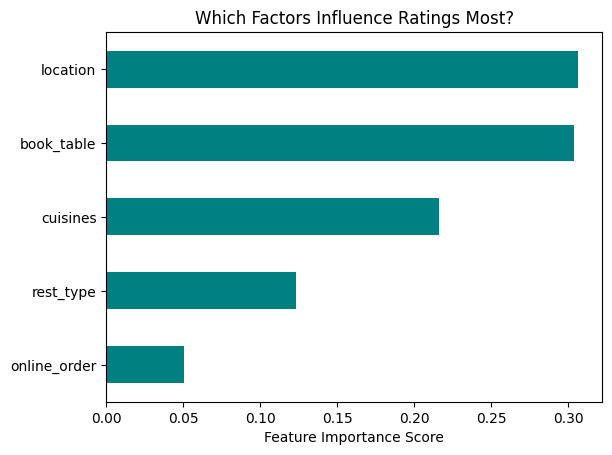

In [44]:
importance = pd.Series(model.feature_importances_, index=cols)
importance.sort_values().plot(kind='barh', color='teal')
plt.title("Which Factors Influence Ratings Most?")
plt.xlabel("Feature Importance Score")
plt.show()

###### Impact of table booking facility on customer votes

In [45]:
df.groupby('book_table')['votes'].mean()

book_table
0     160.581858
1    1146.464464
Name: votes, dtype: float64

C:\Users\Prathamesh Upreti\AppData\Local\Temp\ipykernel_31004\2923418765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='book_table',y='votes',estimator=np.mean, data=df,palette='viridis')


<Axes: xlabel='book_table', ylabel='votes'>

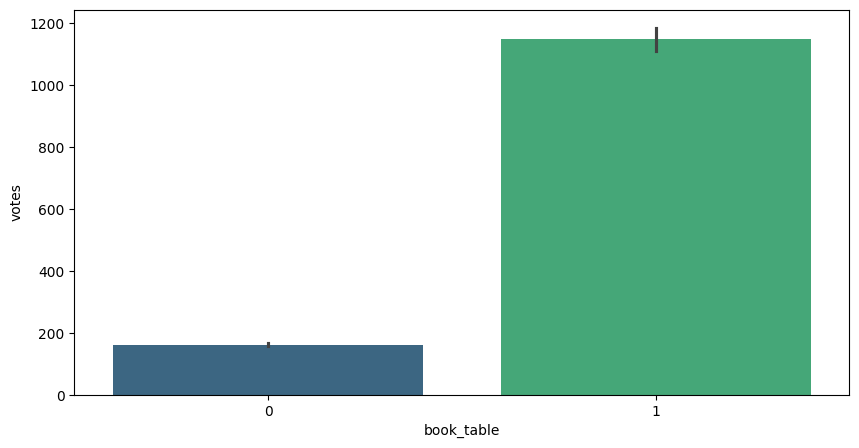

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x='book_table',y='votes',estimator=np.mean, data=df,palette='viridis')

###### Restaurants that provide a table booking facility receive significantly higher customer votes on average.

In [47]:
df.sample()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost of 2,type
643,Sri Laxmi Venkateshwara Coffee Bar,0,0,4.4,343,1,6,60,100.0,Dine-out


###### Do restaurants with online ordering get higher ratings?

In [48]:
df.groupby('online_order')['rate'].mean()

online_order
0    3.672550
1    3.721306
Name: rate, dtype: float64

C:\Users\Prathamesh Upreti\AppData\Local\Temp\ipykernel_31004\763111918.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='online_order',y='rate',estimator=np.mean,data=df,palette='viridis')


<Axes: xlabel='online_order', ylabel='rate'>

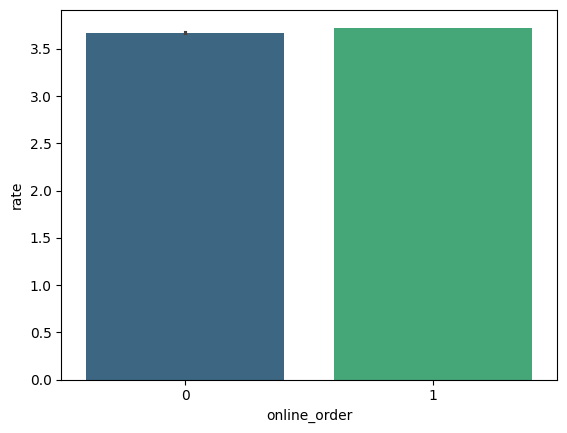

In [49]:
sns.barplot(x='online_order',y='rate',estimator=np.mean,data=df,palette='viridis')

###### So we can say that the restrurent with online ordering get higher rating

In [50]:
dfs.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost of 2,type
0,Jalsa,1,1,4.1,775,1,2,54,800.0,Buffet
1,Spice Elephant,1,0,4.1,787,1,2,69,800.0,Buffet
2,San Churro Cafe,1,0,3.8,918,1,8,69,800.0,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,6,65,300.0,Buffet
4,Grand Village,0,0,3.8,166,4,2,69,600.0,Buffet


###### Identify locations with high demand (votes) but fewer restaurants

In [51]:
demand=cleaned.groupby(['location']).agg({
    'name':'count',
    'votes':'sum'
    
}).reset_index()

demand.rename(columns={'name':'num_of_rest','votes':'Total_votes'},inplace=True)
demand['votes_per_location']=demand['Total_votes']/demand['num_of_rest']
demand

,location,num_of_rest,Total_votes,votes_per_location
0,BTM,5056,573668,113.462816
1,Banashankari,902,162374,180.015521
2,Banaswadi,640,34845,54.445312
3,Bannerghatta Road,1609,214989,133.616532
4,Basavanagudi,684,94919,138.770468
5,Bellandur,1268,205308,161.914826
6,Brigade Road,1210,426682,352.629752
7,Brookefield,656,118962,181.344512
8,Church Street,566,590306,1042.943463
9,Commercial Street,370,25563,69.089189


###### Banashankari	having 902 restrurent and total votes 162374	so to we found votes per rest so higher ratio values so it means high demand but few restrurent

C:\Users\Prathamesh Upreti\AppData\Local\Temp\ipykernel_31004\35951841.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x='votes_per_location',y='location',data=demand.sample(10),palette='coolwarm')


<Axes: xlabel='votes_per_location', ylabel='location'>

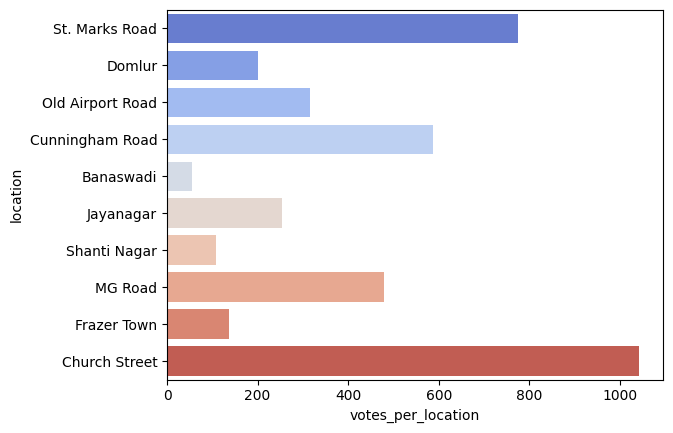

In [52]:
sns.barplot( x='votes_per_location',y='location',data=demand.sample(10),palette='coolwarm')

###### 

In [53]:
cleaned.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost of 2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


###### which type of restrurent have reciced many votes from customers

In [54]:
cleaned.groupby('type')['votes'].sum().sort_values(ascending=False)



type
Delivery              5236082
Dine-out              5115468
Drinks & nightlife    1247364
Buffet                 871526
Cafes                  821558
Pubs and bars          692906
Desserts               536938
Name: votes, dtype: int64

###### Correlation analysis between cost, votes, and ratings

In [55]:
corr=df[['cost of 2','votes','rate']].corr()
corr

,cost of 2,votes,rate
cost of 2,1.000000,0.380882,0.365676
votes,0.380882,1.000000,0.428384
rate,0.365676,0.428384,1.000000


<Axes: >

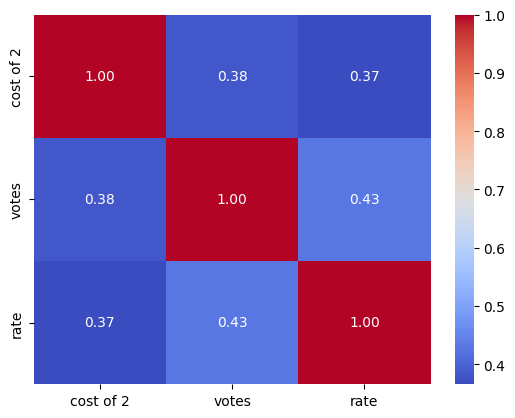

In [56]:
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')


###### votes vs rate (0.43) Strongest correlation here (0.43). Restaurants with higher ratings generally get more votes. 


###### cost of 2 vs rate (0.37) Higher-priced restaurants tend to have better ratings 

###### 0.00 – 0.19	Very weak	Almost no relationship
###### 0.20 – 0.39	Weak to moderate	Some relationship, but not strong
###### 0.40 – 0.59	Moderate	Noticeable relationship
###### 0.60 – 0.79	Strong	Strong relationship
###### 0.80 – 1.00	Very strong	Very high relationship

In [57]:
cleaned.sample()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost of 2,type
11957,Rolls On Wheels,No,No,3.7,61,Cunningham Road,Quick Bites,others,200.0,Delivery


###### averge rating acc to the rating

In [58]:
cleaned.groupby('location')['rate'].mean().sort_values(ascending=False)

location
Lavelle Road             4.104452
St. Marks Road           4.017201
Koramangala 5th Block    3.983956
Church Street            3.979158
Cunningham Road          3.894086
Koramangala 4th Block    3.880851
Residency Road           3.845916
Koramangala 7th Block    3.836130
MG Road                  3.832715
Indiranagar              3.816551
Richmond Road            3.787084
Koramangala 6th Block    3.776496
Kalyan Nagar             3.768396
Jayanagar                3.768392
Malleshwaram             3.753830
Ulsoor                   3.749974
Brigade Road             3.703655
Koramangala 1st Block    3.698183
New BEL Road             3.693509
Sarjapur Road            3.693150
JP Nagar                 3.682720
HSR                      3.682627
Kammanahalli             3.675463
Basavanagudi             3.674872
Old Airport Road         3.663185
Banashankari             3.658672
Whitefield               3.643979
Rajajinagar              3.634041
others                   3.631481
Fraze

In [59]:
cleaned.groupby('cuisines')['votes'].sum().sort_values(ascending=False).head(10)

cuisines
others                        11542182
North Indian                    516310
North Indian, Chinese           258225
South Indian                    161975
North Indian, Mughlai           103706
Chinese                         101728
Cafe                             89986
North Indian, South Indian       88925
Desserts                         84323
Chinese, Momos                   82796
Name: votes, dtype: int64

C:\Users\Prathamesh Upreti\AppData\Local\Temp\ipykernel_31004\2419353904.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cuisine_votes.values, x=cuisine_votes.index, palette='magma')


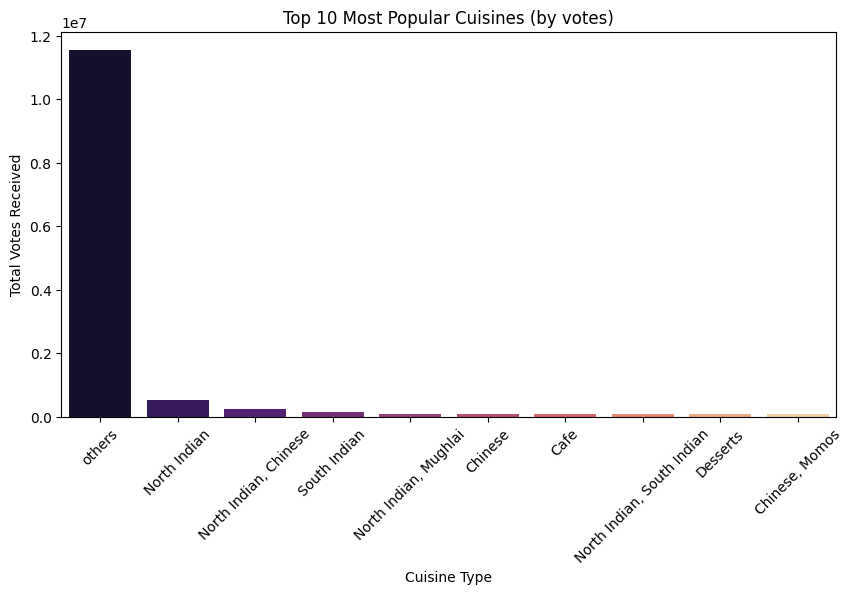

In [60]:
cuisine_votes = cleaned.groupby('cuisines')['votes'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=cuisine_votes.values, x=cuisine_votes.index, palette='magma')
plt.title("Top 10 Most Popular Cuisines (by votes)")
plt.ylabel("Total Votes Received")
plt.xticks(rotation=45)
plt.xlabel("Cuisine Type")
plt.show()

In [61]:
cleaned.sample(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost of 2,type
36072,Ambur Biryani,No,No,3.500000,17,others,Quick Bites,others,250.0,Delivery
37208,Afghani Tandoori Hub,Yes,No,3.700000,14,BTM,Quick Bites,others,400.0,Dine-out
22423,Sri Banashankari Upahara,Yes,No,3.700142,0,others,Quick Bites,"North Indian, South Indian",150.0,Delivery
4715,Udupi Ruchi,Yes,No,3.800000,240,Bellandur,Quick Bites,"South Indian, North Indian, Chinese, Street Food",200.0,Dine-out
39199,Food Court,No,No,3.300000,4,others,Quick Bites,"South Indian, North Indian, Chinese, Street Food",300.0,Dine-out
2383,Junkealth,No,No,3.700142,0,JP Nagar,Quick Bites,others,300.0,Dine-out
37733,Fresh Pressery Cafe,No,No,4.100000,104,Lavelle Road,others,others,1200.0,Cafes
1401,Kulkarni's New Uttara Karnataka Food Specialit...,Yes,No,3.400000,6,JP Nagar,Quick Bites,South Indian,250.0,Delivery
12802,Hotel Shangrila,No,No,3.700000,125,Brigade Road,Casual Dining,"Chinese, Thai, Momos",600.0,Dine-out
27213,Foody's Land,Yes,No,3.700142,0,Koramangala 4th Block,Quick Bites,Fast Food,300.0,Delivery


###### Which cuisine or restaurant type should new investors target based on rating, popularity, and cost?

In [62]:
rest_type=cleaned.groupby('rest_type').agg({
    'rate':'mean',
    'votes':'sum',
    'cost of 2':'mean'

}).reset_index()
rest_type

,rest_type,rate,votes,cost of 2
0,Bakery,3.643212,35584,370.377193
1,Cafe,3.835373,1435368,620.165671
2,Casual Dining,3.737871,4530912,790.539354
3,"Casual Dining, Bar",4.063988,1209725,1249.690265
4,Delivery,3.616833,223625,432.928904
5,Dessert Parlor,3.846457,322216,332.488849
6,Quick Bites,3.587687,1473129,317.457128
7,"Takeaway, Delivery",3.581825,87672,392.159363
8,others,3.821901,5203611,828.938132


In [63]:
scaler=MinMaxScaler()
rest_type[['rate_norm', 'votes_norm', 'cost_norm']]=scaler.fit_transform(rest_type[['rate', 'votes', 'cost of 2']])
rest_type[['rest_type','rate_norm', 'votes_norm', 'cost_norm']]

,rest_type,rate_norm,votes_norm,cost_norm
0,Bakery,0.127317,0.000000,0.056767
1,Cafe,0.525857,0.270855,0.324713
2,Casual Dining,0.323639,0.869834,0.507472
3,"Casual Dining, Bar",1.000000,0.227193,1.000000
4,Delivery,0.072607,0.036385,0.123866
5,Dessert Parlor,0.548843,0.055463,0.016124
6,Quick Bites,0.012159,0.278161,0.000000
7,"Takeaway, Delivery",0.000000,0.010079,0.080133
8,others,0.497915,1.000000,0.548662


###### Normalize the values to 0 and 1 since we can't combine or comapare these raw values direclty so we normalize it

In [64]:
rest_type['Investor_score']= (rest_type['rate_norm']*0.5) + (rest_type['votes_norm']*0.3) + ((1 - rest_type['cost_norm'])*0.2)
rest_type=rest_type.sort_values(by='Investor_score',ascending=False)
rest_type

,rest_type,rate,votes,cost of 2,rate_norm,votes_norm,cost_norm,Investor_score
8,others,3.821901,5203611,828.938132,0.497915,1.000000,0.548662,0.639225
3,"Casual Dining, Bar",4.063988,1209725,1249.690265,1.000000,0.227193,1.000000,0.568158
2,Casual Dining,3.737871,4530912,790.539354,0.323639,0.869834,0.507472,0.521275
5,Dessert Parlor,3.846457,322216,332.488849,0.548843,0.055463,0.016124,0.487836
1,Cafe,3.835373,1435368,620.165671,0.525857,0.270855,0.324713,0.479242
6,Quick Bites,3.587687,1473129,317.457128,0.012159,0.278161,0.000000,0.289528
0,Bakery,3.643212,35584,370.377193,0.127317,0.000000,0.056767,0.252305
4,Delivery,3.616833,223625,432.928904,0.072607,0.036385,0.123866,0.222446
7,"Takeaway, Delivery",3.581825,87672,392.159363,0.000000,0.010079,0.080133,0.186997


C:\Users\Prathamesh Upreti\AppData\Local\Temp\ipykernel_31004\642213708.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rest_type.head(), x='rest_type', y='Investor_score', palette='viridis')


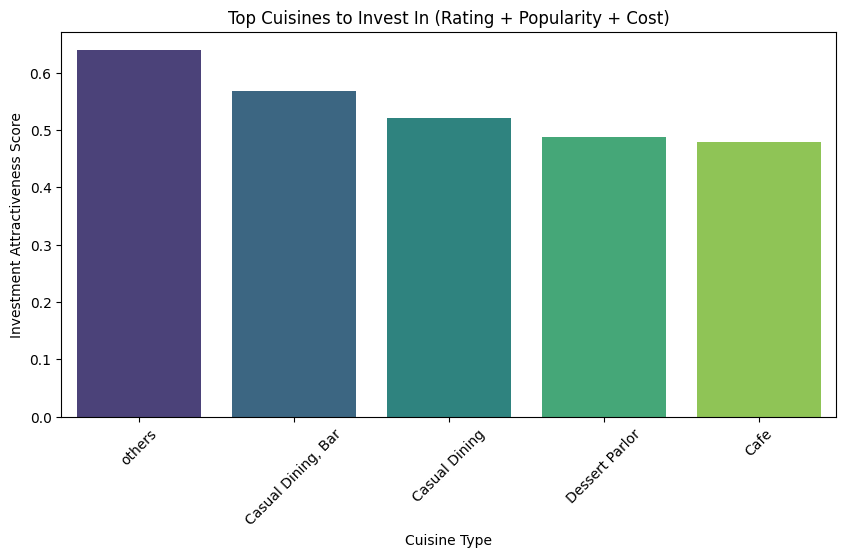

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(data=rest_type.head(), x='rest_type', y='Investor_score', palette='viridis')
plt.xticks(rotation=45)
plt.title("Top Cuisines to Invest In (Rating + Popularity + Cost)")
plt.xlabel("Cuisine Type")
plt.ylabel("Investment Attractiveness Score")
plt.show()

###### New investors should target multi-cuisine and dessert–beverage combinations, as these segments show strong customer interest (votes) and high satisfaction (ratings) while maintaining manageable costs.

###### These cuisines represent the best balance of popularity, profitability, and quality, making them ideal for new restaurant ventures.

In [66]:
cleaned.sample()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost of 2,type
4038,Charcoal Eats,Yes,No,4.0,55,HSR,Quick Bites,others,500.0,Delivery


###### Which locations show opportunities for new restaurants (low competition + high demand)?

In [67]:
location= cleaned.groupby('location').agg({
    'name':'count',
    'votes':'sum',
    'rate':'mean'
}).rename(columns={'name': 'restaurant_count'}).reset_index()




In [68]:
location['votes_per_restaurant']=location['votes']/location['restaurant_count']
top_opportunity = location.sort_values(by='votes_per_restaurant', ascending=False).head(10)
top_opportunity


,location,restaurant_count,votes,rate,votes_per_restaurant
8,Church Street,566,590306,3.979158,1042.943463
26,Lavelle Road,518,495777,4.104452,957.098456
23,Koramangala 5th Block,2479,2214083,3.983956,893.135539
38,St. Marks Road,343,266099,4.017201,775.798834
22,Koramangala 4th Block,1017,685156,3.880851,673.703048
10,Cunningham Road,490,287471,3.894086,586.675510
16,Indiranagar,2026,1165909,3.816551,575.473346
27,MG Road,893,428266,3.832715,479.581187
33,Residency Road,671,290513,3.845916,432.955291
25,Koramangala 7th Block,1174,488225,3.836130,415.864566


C:\Users\Prathamesh Upreti\AppData\Local\Temp\ipykernel_31004\3106473638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_opportunity, x='location', y='votes_per_restaurant', palette='magma')


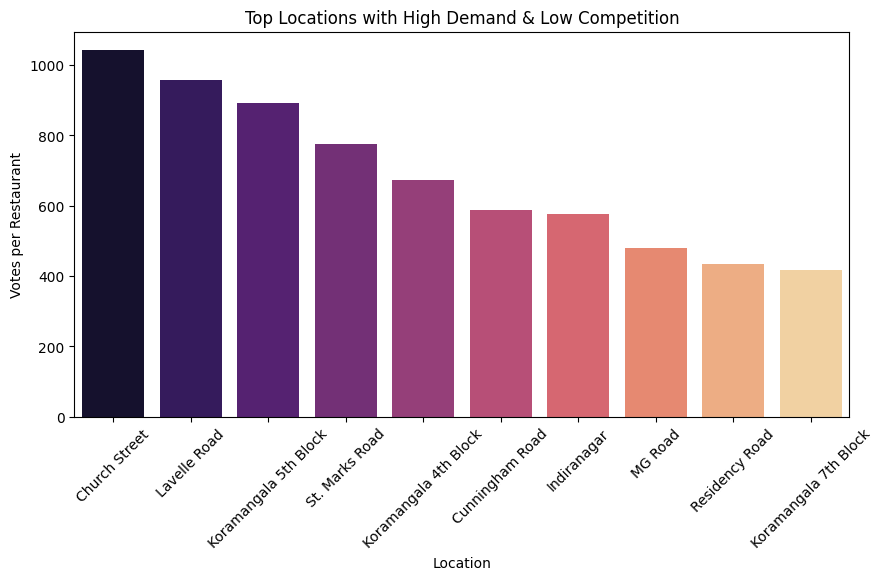

In [69]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_opportunity, x='location', y='votes_per_restaurant', palette='magma')
plt.xticks(rotation=45)
plt.title("Top Locations with High Demand & Low Competition")
plt.xlabel("Location")
plt.ylabel("Votes per Restaurant")
plt.show()

###### Church Street-Highest potential — very high customer demand but limited restaurant options. Excellent spot for investment.

In [70]:
df.sample()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost of 2,type
32335,99 Pancakes,1,0,4.5,345,23,8,69,300.0,Delivery


###### Does enabling online orders correlate with higher ratings or votes?

In [71]:
online_order_metrics = cleaned.groupby('online_order')[['rate', 'votes']].mean().reset_index()
online_order_metrics


,online_order,rate,votes
0,No,3.672550,250.706448
1,Yes,3.721306,307.782123


###### Yes enabling online order correlate wuth higher rating and  votes

###### Restaurants offering online delivery often get more reviews/votes 

In [72]:
cleaned.sample()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost of 2,type
16492,Ooty Chocolates,Yes,No,3.3,9,Sarjapur Road,Dessert Parlor,Desserts,300.0,Delivery


###### What is the distribution of ratings — do most restaurants fall between 3.5–4 or lower?

In [73]:
bins = [0, 3, 3.5, 4, 4.5, 5]
labels = ['<3', '3-3.5', '3.5-4', '4-4.5', '>4.5']
df['rating_range'] = pd.cut(df['rate'], bins=bins, labels=labels)
df['rating_range']

0        4-4.5
1        4-4.5
2        3.5-4
3        3.5-4
4        3.5-4
         ...  
51712    3.5-4
51713    3.5-4
51714    3.5-4
51715    4-4.5
51716    3-3.5
Name: rating_range, Length: 51042, dtype: category
Categories (5, object): ['<3' < '3-3.5' < '3.5-4' < '4-4.5' < '>4.5']

In [74]:
rating_counts = df['rating_range'].value_counts(normalize=True) * 100
rating_counts


rating_range
3.5-4    54.555072
3-3.5    21.286392
4-4.5    16.729360
<3        6.279143
>4.5      1.150033
Name: proportion, dtype: float64

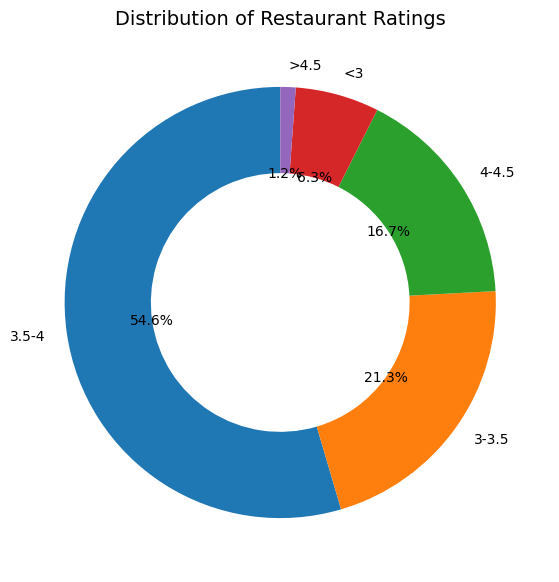

In [75]:
plt.figure(figsize=(7,7))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, 
        wedgeprops={'width':0.4})
plt.title('Distribution of Restaurant Ratings', fontsize=14)
plt.show()

In [76]:
cleaned.sample(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost of 2,type
39489,Amrut,Yes,No,3.500000,250,Malleshwaram,Quick Bites,"North Indian, Chinese, Fast Food",300.0,Delivery
31946,RGS Ambur briyani,No,No,3.700142,0,BTM,Quick Bites,"Biryani, Kebab",300.0,Dine-out
44728,Empire Restaurant,Yes,No,4.100000,8286,Indiranagar,Casual Dining,others,750.0,Buffet
27692,Parivaar,No,No,3.300000,7,BTM,Delivery,"Biryani, North Indian, Chinese",600.0,Delivery
43805,Pooja Veg,No,No,3.100000,9,Frazer Town,Quick Bites,South Indian,100.0,Dine-out
16585,Gruhalakshmi Home Foods,Yes,No,3.700142,0,others,others,Mithai,250.0,Delivery
36909,Shree Nandini Andhra Mess,No,No,3.300000,5,Koramangala 5th Block,others,Andhra,150.0,Dine-out
11379,Combo King Paramount,No,No,3.100000,12,Jayanagar,others,others,500.0,Dine-out
3492,Golden Oak - La Marvella Sarovar Premiere Hotel,No,Yes,4.000000,370,Jayanagar,Casual Dining,others,1000.0,Dine-out
50373,Hotel Sai Renaissance,Yes,Yes,3.600000,32,Whitefield,Casual Dining,"South Indian, North Indian, Chinese",450.0,Delivery


###### Which cuisines have the highest average rating?

In [77]:
avg_cuisine=cleaned.groupby('cuisines')['rate'].mean().sort_values(ascending=False)
avg_cuisine=avg_cuisine.reset_index()
avg_cuisine.columns=['Cuisine','Avg_Rating']
avg_cuisine.head(10)

,Cuisine,Avg_Rating
0,"Cafe, Desserts",4.060309
1,"Desserts, Beverages",4.047518
2,"Cafe, Continental",3.887151
3,"North Indian, Mughlai",3.865786
4,"Chinese, Momos",3.853369
5,"Desserts, Ice Cream",3.851907
6,"Ice Cream, Desserts",3.836878
7,"Cafe, Bakery",3.834874
8,"North Indian, Chinese, Seafood",3.810809
9,Desserts,3.787307


C:\Users\Prathamesh Upreti\AppData\Local\Temp\ipykernel_31004\2254512817.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cuisine.head(10), x='Avg_Rating', y='Cuisine', palette='crest')


<Axes: xlabel='Avg_Rating', ylabel='Cuisine'>

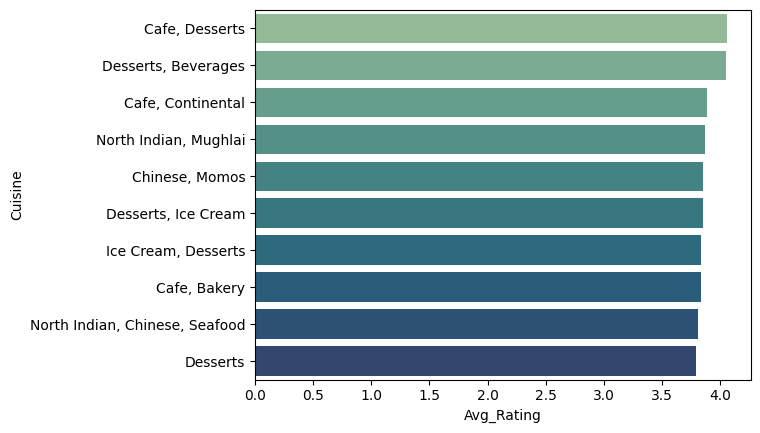

In [78]:
sns.barplot(data=avg_cuisine.head(10), x='Avg_Rating', y='Cuisine', palette='crest')

In [79]:
cleaned.groupby('location')['name'].value_counts()

location  name                       
BTM       Chillout                       21
          Miss Momo                      20
          Bakers Town                    18
          Cafe 221B                      18
          Invitation Bar & Restaurant    18
                                         ..
others    Yataii - Shangri-La Hotel       1
          Yumjar                          1
          Zamindars Biryani Durbar        1
          Zamorin's Mappillah Biryani     1
          Zu's Doner Kebaps               1
Name: count, Length: 11863, dtype: int64

In [80]:

top10_restaurants = df.sort_values(by='rate', ascending=False).head(10)
print(top10_restaurants[['name', 'rate']])

                                 name  rate
5809           Belgian Waffle Factory   4.9
49627     Byg Brewski Brewing Company   4.9
10389       AB's - Absolute Barbecues   4.9
10284          Belgian Waffle Factory   4.9
49170     Byg Brewski Brewing Company   4.9
8275   Asia Kitchen By Mainland China   4.9
6746                         Flechazo   4.9
32110  Asia Kitchen By Mainland China   4.9
46960                    Punjab Grill   4.9
47987          Belgian Waffle Factory   4.9
